# The tissues 3D reconstruction

This notebook demonstrates the process of tissues 3D reconstruction based on whole body 3D point cloud model. This is done in the following four steps.
1. Extract the 3D point cloud model of each tissue by the groups label；
2. Construct the mesh model based on the 3D point cloud model;
3. Integrate multiple tissue models together to build a complete 3D model of the organism;
4. Save the models as vtk file.

### Packages

In [1]:
import math
import os
import spateo as st
import numpy as np
import matplotlib.colors as mplc

network.py (36): The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.


### Data source

In [150]:
wb_pc = st.tdr.read_model(filename="/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction/E8-10_b_spateo/wb_model/wb_pc.vtk")
shell = st.tdr.read_model(filename="/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction/E8-10_b_spateo/wb_model/wb_shell_mesh.vtk")
st.tdr.scale_model(model=shell, scale_factor=[1.05, 1.05, 1.05], inplace=True)

save_folder = "/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction"
save_tdr_folder = os.path.join(save_folder, f"E8-10_b_spateo")
save_model_folder = os.path.join(save_tdr_folder, f"tissue_model")
save_image_folder = os.path.join(save_tdr_folder, f"tissue_image")

for folder in [save_folder, save_tdr_folder, save_image_folder, save_model_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)

### Extract the 3D point cloud model of each tissue by the groups label

#### Tissue names

In [3]:
tissues = np.asarray(wb_pc.point_data["tissue"])
tissue_names = np.unique(tissues).tolist()
print(tissue_names)

['Amnioserosa', 'CNS', 'Epidermis', 'Fat body', 'Foregut', 'Head ectoderm', 'Midgut', 'Muscle', 'Plasmatocytes', 'Procrystal cell', 'Salivary gland body', 'Sensory nervous system', 'Tracheal']


#### Extract the 3D point cloud model of each tissue by the tissue label

##### Amnioserosa

In [4]:
tissue = "Amnioserosa"
amn_model_folder = os.path.join(save_model_folder, tissue)
amn_image_folder = os.path.join(save_image_folder, tissue)
for folder in [amn_model_folder, amn_image_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)

In [7]:
amn_pc = st.tdr.three_d_pick(model=wb_pc, key="tissue", picked_groups=tissue)[0]
amn_tpc = st.tdr.interactive_rectangle_clip(model=amn_pc, key="tissue", invert=True)[0]

  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'


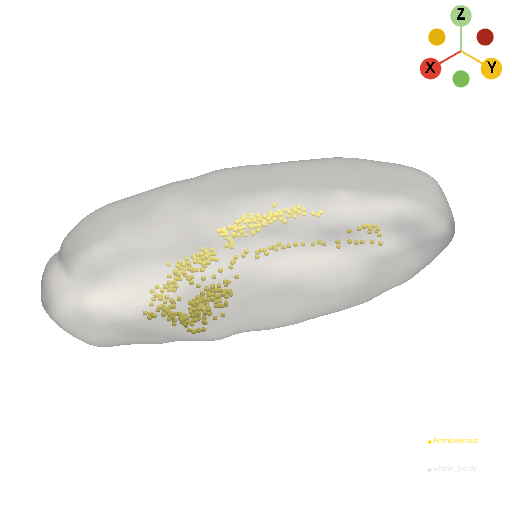

In [88]:
amn_tpc_vis = st.tdr.collect_model([shell, amn_tpc])
st.pl.three_d_plot(model=amn_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5, window_size=(512, 512), off_screen=True,
                   filename=os.path.join(amn_image_folder, f"{tissue}_pc_iso.pdf"))
st.pl.three_d_plot(model=amn_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5, window_size=(512, 512), jupyter="static", filename=None)

##### CNS

In [18]:
tissue = "CNS"
cns_model_folder = os.path.join(save_model_folder, tissue)
cns_image_folder = os.path.join(save_image_folder, tissue)
for folder in [cns_model_folder, cns_image_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)

In [19]:
cns_pc = st.tdr.three_d_pick(model=wb_pc, key="tissue", picked_groups=tissue)[0]
cns_tpc = st.tdr.interactive_rectangle_clip(model=cns_pc, key="tissue", invert=True)[0]

  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'


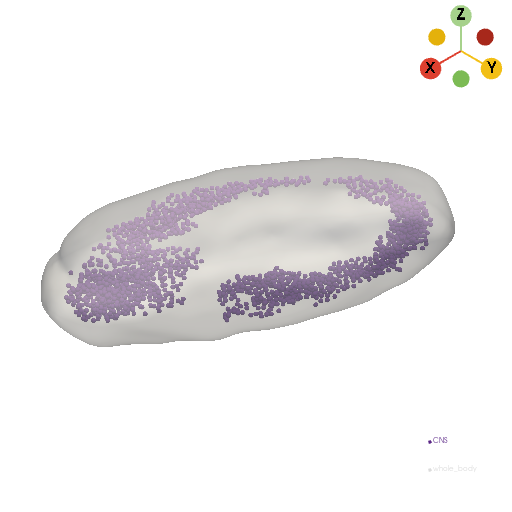

In [89]:
cns_tpc_vis = st.tdr.collect_model([shell, cns_tpc])
st.pl.three_d_plot(model=cns_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5, window_size=(512, 512), off_screen=True,
                   filename=os.path.join(amn_image_folder, f"{tissue}_pc_iso.pdf"))
st.pl.three_d_plot(model=cns_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5, window_size=(512, 512), jupyter="static", filename=None)

##### Epidermis

In [21]:
tissue = "Epidermis"
epi_model_folder = os.path.join(save_model_folder, tissue)
epi_image_folder = os.path.join(save_image_folder, tissue)
for folder in [epi_model_folder, epi_image_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)

In [22]:
epi_pc = st.tdr.three_d_pick(model=wb_pc, key="tissue", picked_groups=tissue)[0]
epi_tpc = st.tdr.interactive_rectangle_clip(model=epi_pc, key="tissue", invert=True)[0]

  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'


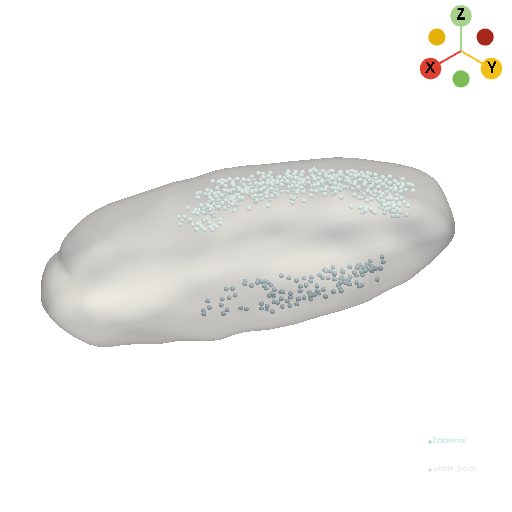

In [90]:
epi_tpc_vis = st.tdr.collect_model([shell, epi_tpc])
st.pl.three_d_plot(model=epi_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), off_screen=True,
                   filename=os.path.join(epi_image_folder, f"{tissue}_pc_iso.pdf"))
st.pl.three_d_plot(model=epi_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), jupyter="static", filename=None)

##### Fat body

In [24]:
tissue = "Fat body"
fb_model_folder = os.path.join(save_model_folder, tissue)
fb_image_folder = os.path.join(save_image_folder, tissue)
for folder in [fb_model_folder, fb_image_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)

In [25]:
fb_pc = st.tdr.three_d_pick(model=wb_pc, key="tissue", picked_groups=tissue)[0]
fb_tpc = st.tdr.interactive_rectangle_clip(model=fb_pc, key="tissue", invert=True)[0]

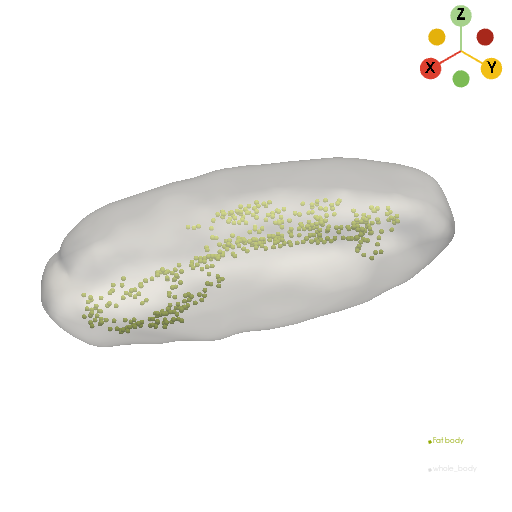

In [91]:
fb_tpc_vis = st.tdr.collect_model([shell, fb_tpc])
st.pl.three_d_plot(model=fb_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), off_screen=True,
                   filename=os.path.join(fb_image_folder, f"{tissue}_pc_iso.pdf"))
st.pl.three_d_plot(model=fb_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), jupyter="static", filename=None)

##### Foregut

In [27]:
tissue = "Foregut"
for_model_folder = os.path.join(save_model_folder, tissue)
for_image_folder = os.path.join(save_image_folder, tissue)
for folder in [for_model_folder, for_image_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)

In [28]:
for_pc = st.tdr.three_d_pick(model=wb_pc, key="tissue", picked_groups=tissue)[0]
for_tpc = st.tdr.interactive_rectangle_clip(model=for_pc, key="tissue", invert=True)[0]

  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'


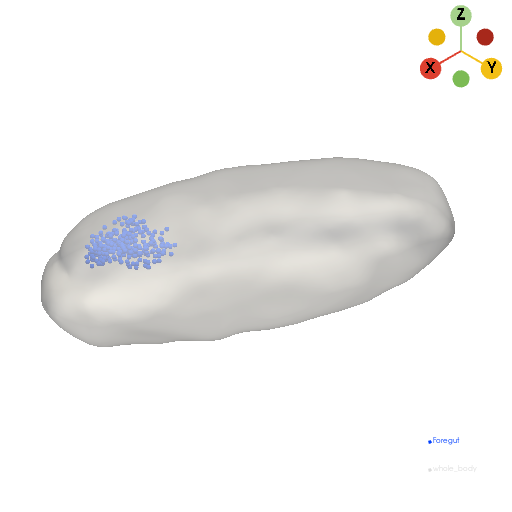

In [92]:
for_tpc_vis = st.tdr.collect_model([shell, for_tpc])
st.pl.three_d_plot(model=for_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), off_screen=True,
                   filename=os.path.join(for_image_folder, f"{tissue}_pc_iso.pdf"))
st.pl.three_d_plot(model=for_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), jupyter="static", filename=None)

##### Midgut

In [180]:
tissue = "Midgut"
mid_model_folder = os.path.join(save_model_folder, tissue)
mid_image_folder = os.path.join(save_image_folder, tissue)
for folder in [mid_model_folder, mid_image_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)

In [181]:
mid_pc = st.tdr.three_d_pick(model=wb_pc, key="tissue", picked_groups=tissue)[0]
mid_tpc = st.tdr.interactive_rectangle_clip(model=mid_pc, key="tissue", invert=True)[0]

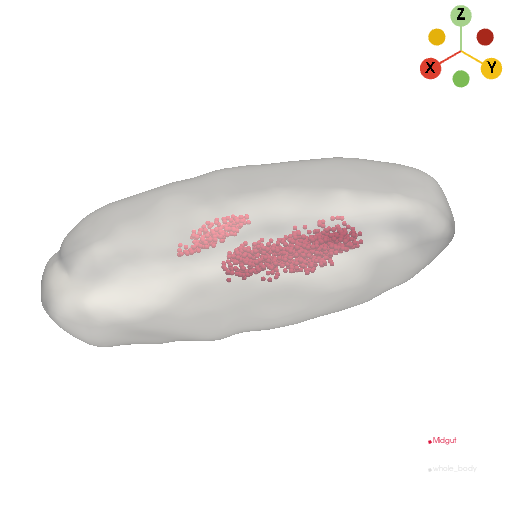

In [182]:
mid_tpc_vis = st.tdr.collect_model([shell, mid_tpc])
st.pl.three_d_plot(model=mid_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), off_screen=True,
                   filename=os.path.join(mid_image_folder, f"{tissue}_pc_iso.pdf"))
st.pl.three_d_plot(model=mid_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), jupyter="static", filename=None)

##### Muscle

In [33]:
tissue = "Muscle"
mus_model_folder = os.path.join(save_model_folder, tissue)
mus_image_folder = os.path.join(save_image_folder, tissue)
for folder in [mus_model_folder, mus_image_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)

In [34]:
mus_pc = st.tdr.three_d_pick(model=wb_pc, key="tissue", picked_groups=tissue)[0]
mus_tpc = st.tdr.interactive_rectangle_clip(model=mus_pc, key="tissue", invert=True)[0]

  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
  File "/home/yao/PythonProject/Yao_packages

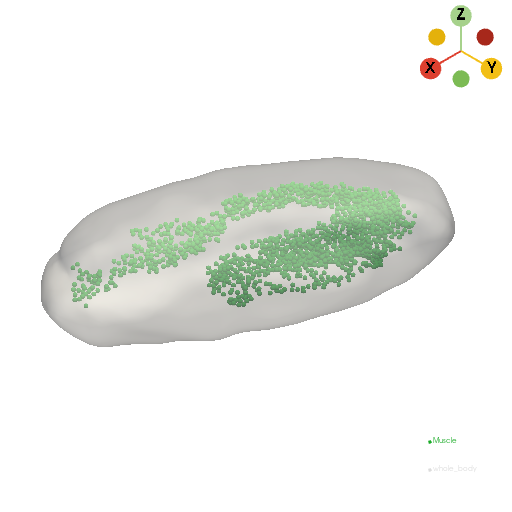

In [94]:
mus_tpc_vis = st.tdr.collect_model([shell, mus_tpc])
st.pl.three_d_plot(model=mus_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), off_screen=True,
                   filename=os.path.join(mus_image_folder, f"{tissue}_pc_iso.pdf"))
st.pl.three_d_plot(model=mus_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), jupyter="static", filename=None)

##### Salivary gland body

In [36]:
tissue = "Salivary gland body"
sgb_model_folder = os.path.join(save_model_folder, tissue)
sgb_image_folder = os.path.join(save_image_folder, tissue)
for folder in [sgb_model_folder, sgb_image_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)

In [37]:
sgb_pc = st.tdr.three_d_pick(model=wb_pc, key="tissue", picked_groups=tissue)[0]
sgb_tpc = st.tdr.interactive_rectangle_clip(model=sgb_pc, key="tissue", invert=True)[0]

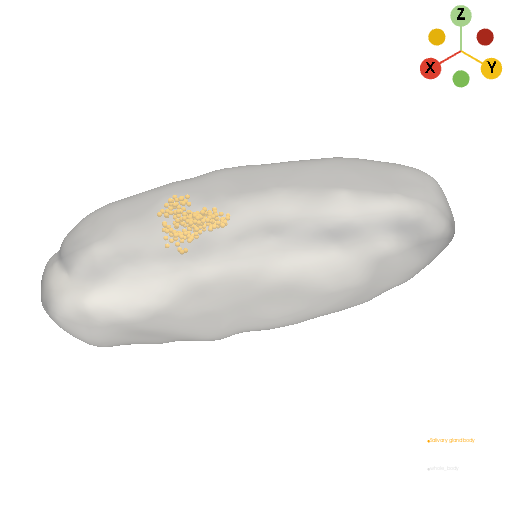

In [95]:
sgb_tpc_vis = st.tdr.collect_model([shell, sgb_tpc])
st.pl.three_d_plot(model=sgb_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), off_screen=True,
                   filename=os.path.join(sgb_image_folder, f"{tissue}_pc_iso.pdf"))
st.pl.three_d_plot(model=sgb_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), jupyter="static", filename=None)

##### Sensory nervous system

In [39]:
tissue = "Sensory nervous system"
sns_model_folder = os.path.join(save_model_folder, tissue)
sns_image_folder = os.path.join(save_image_folder, tissue)
for folder in [sns_model_folder, sns_image_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)

In [40]:
sns_pc = st.tdr.three_d_pick(model=wb_pc, key="tissue", picked_groups=tissue)[0]
sns_tpc = st.tdr.interactive_rectangle_clip(model=sns_pc, key="tissue", invert=True)[0]

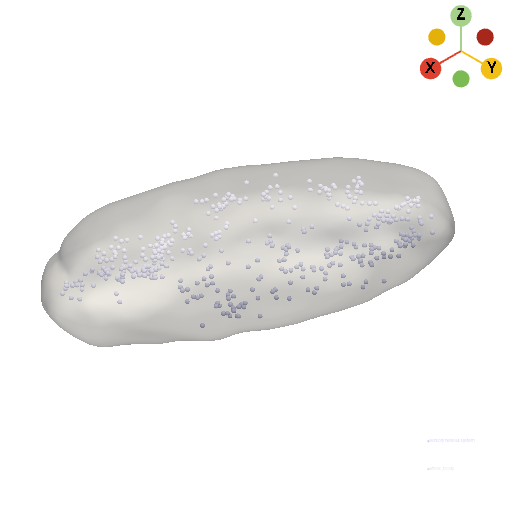

In [96]:
sns_tpc_vis = st.tdr.collect_model([shell, sns_tpc])
st.pl.three_d_plot(model=sns_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), off_screen=True,
                   filename=os.path.join(sns_image_folder, f"{tissue}_pc_iso.pdf"))
st.pl.three_d_plot(model=sns_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), jupyter="static", filename=None)

##### Tracheal

In [196]:
tissue = "Tracheal"
tra_model_folder = os.path.join(save_model_folder, tissue)
tra_image_folder = os.path.join(save_image_folder, tissue)
for folder in [tra_model_folder, tra_image_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)

In [197]:
tra_pc = st.tdr.three_d_pick(model=wb_pc, key="tissue", picked_groups=tissue)[0]
tra_tpc = st.tdr.interactive_rectangle_clip(model=tra_pc, key="tissue", invert=True)[0]

  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
  File "/home/yao/PythonProject/Yao_packages/spatial_pipeline/spateo_tdr_flow_v1/E8-10_b/spateo/tdr/widgets/clip.py", line 26, in _split_model
    if not original_model.n_cells:
AttributeError: 'NoneType' object has no attribute 'n_cells'
  File "/home/yao/PythonProject/Yao_packages

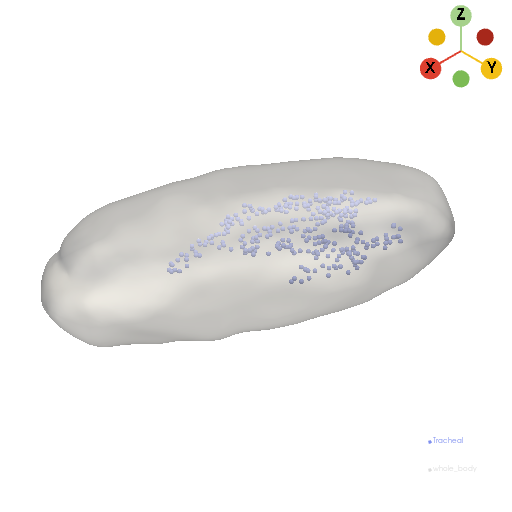

In [198]:
tra_tpc_vis = st.tdr.collect_model([shell, tra_tpc])
st.pl.three_d_plot(model=tra_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), off_screen=True,
                   filename=os.path.join(tra_image_folder, f"{tissue}_pc_iso.pdf"))
st.pl.three_d_plot(model=tra_tpc_vis, key="tissue", model_style=["surface", "points"], model_size=5,
                   window_size=(512, 512), jupyter="static", filename=None)

#### Visualize all tissue point cloud models

In [199]:
tissue_pcs = st.tdr.collect_model([amn_tpc, cns_tpc, epi_tpc, fb_tpc, for_tpc, mid_tpc, mus_tpc, sgb_tpc, sns_tpc, tra_tpc])
tissue_pcs_vis = st.tdr.collect_model([amn_tpc_vis, cns_tpc_vis, epi_tpc_vis, fb_tpc_vis, for_tpc_vis, mid_tpc_vis, mus_tpc_vis, sgb_tpc_vis, sns_tpc_vis, tra_tpc_vis])
tissue_text = ['Amnioserosa', 'CNS', 'Epidermis', 'Fat body', 'Foregut', 'Midgut', 'Muscle', 'Salivary gland body', 'Sensory nervous system', 'Tracheal']

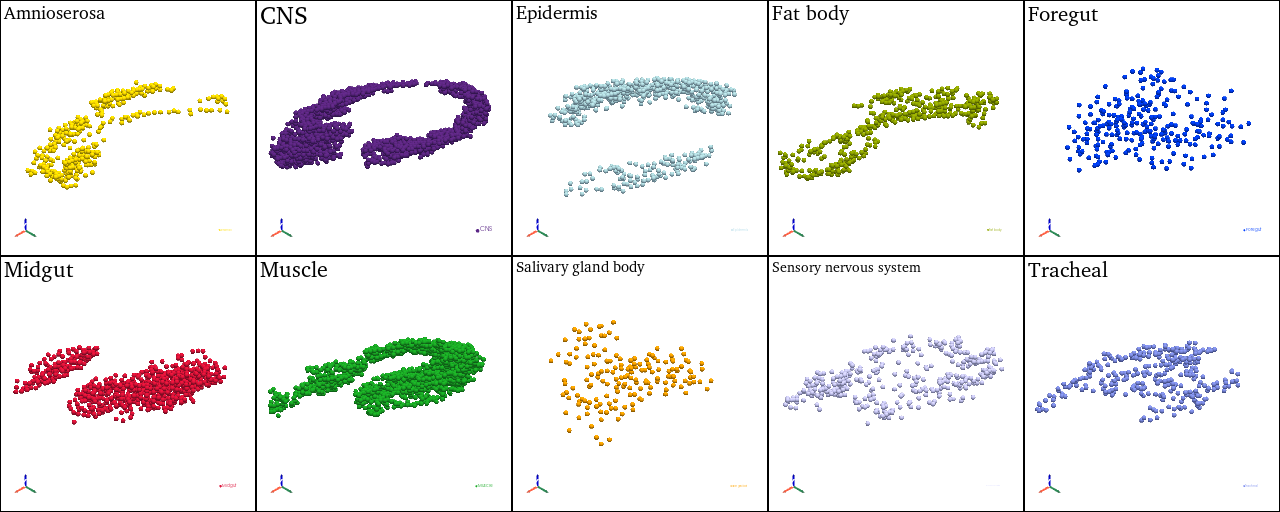

In [200]:
st.pl.three_d_multi_plot(model=tissue_pcs, key="tissue", model_style="points", model_size=5, off_screen=True,
                         text=tissue_text, shape=(2, 5), window_size=(256*5, 256*2),
                         text_kwargs={"text_size": 10}, show_legend=True, jupyter="static", filename=None)
st.pl.three_d_multi_plot(model=tissue_pcs, key="tissue", model_style="points", model_size=5, off_screen=True,
                         text=tissue_text, shape=(2, 5), window_size=(256*5, 256*2),
                         text_kwargs={"text_size": 10}, show_legend=True, filename=os.path.join(save_image_folder, f"tissue_pcs_iso.pdf"))

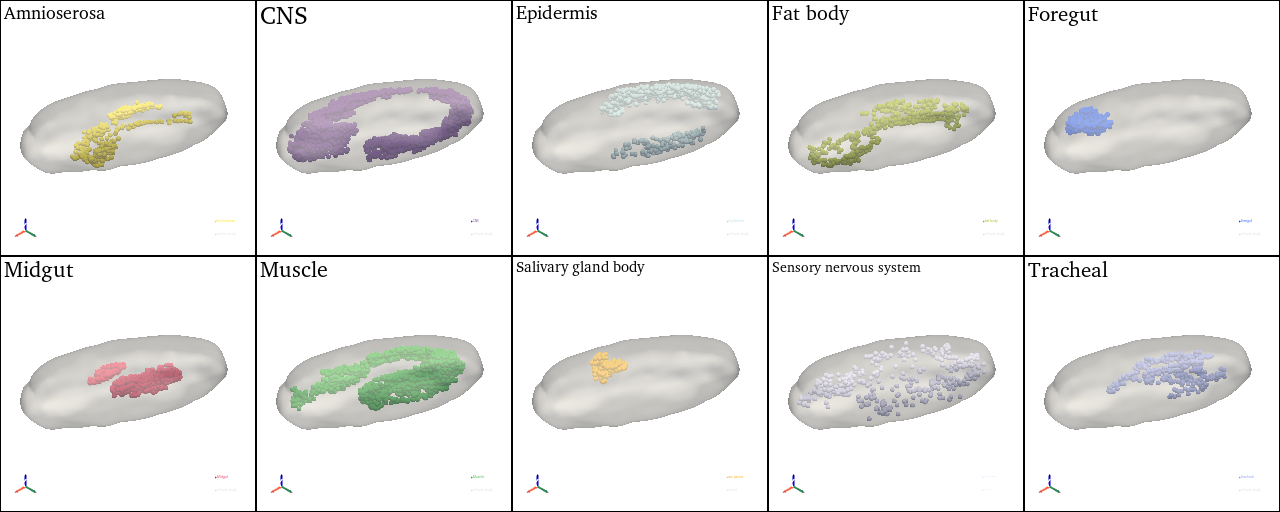

In [201]:
st.pl.three_d_multi_plot(model=tissue_pcs_vis, key="tissue", model_style=["surface", "points"], model_size=5, off_screen=True,
                         text=tissue_text, shape=(2, 5), window_size=(256*5, 256*2),
                         text_kwargs={"text_size": 10}, show_legend=True, jupyter="static", filename=None)
st.pl.three_d_multi_plot(model=tissue_pcs_vis, key="tissue", model_style=["surface", "points"], model_size=5, off_screen=True,
                         text=tissue_text, shape=(2, 5), window_size=(256*5, 256*2),
                         text_kwargs={"text_size": 10}, show_legend=True, filename=os.path.join(save_image_folder, f"tissue_pcs_iso.pdf"))

### Construct the mesh model based on the 3D point cloud model

In [202]:
for tm, tt in zip(tissue_pcs, tissue_text):
    st.tdr.save_model(model=tm, filename=os.path.join(save_model_folder, f"{tt}/{tt}_pc.vtk"))

#### Construct the mesh model

##### Amnioserosa

In [101]:
amn_color = mplc.to_hex(c=amn_tpc["tissue_rgba"][0], keep_alpha=True)
amn_mesh, amn_mpc = st.tdr.construct_surface(pc=amn_tpc, key_added="tissue", label="Amnioserosa", color=amn_color, alpha=1.0,
                                      cs_method="marching_cube", smooth=3000, scale_factor=1)

In [102]:
amn_cell_radius = pow(np.asarray(amn_mpc.point_data["cell_area"]), 1 / 2)
amn_cell = st.tdr.construct_cells(pc=amn_mpc, cell_size=amn_cell_radius, geometry="sphere", factor=0.3)

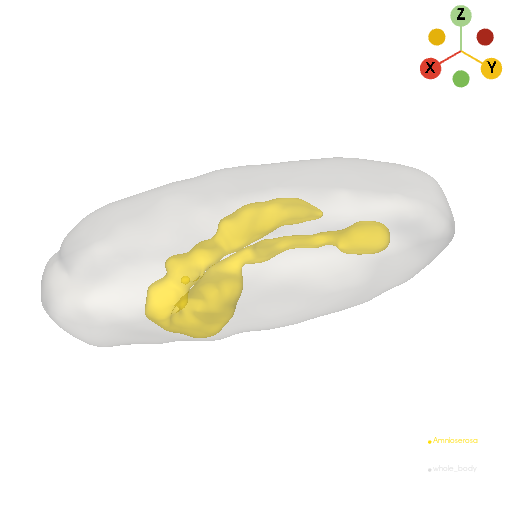

In [103]:
amn_model_vis1 = st.tdr.collect_model(models=[shell, amn_mesh])
_ = st.pl.three_d_plot(model=amn_model_vis1, key="tissue", model_style="surface", opacity=0.5, off_screen=False, window_size=(512, 512),
                       filename=os.path.join(amn_image_folder, f"Amnioserosa_mesh_iso1.pdf"))
_ = st.pl.three_d_plot(model=amn_model_vis1, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512), jupyter="static", filename=None)

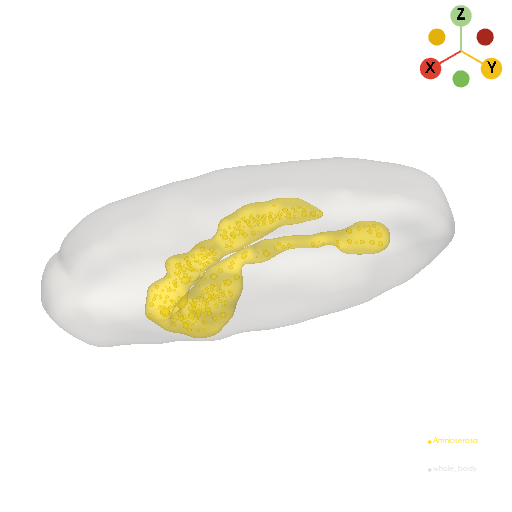

In [104]:
amn_model_vis2 = st.tdr.collect_model(models=[shell, amn_mesh, amn_cell])
_ = st.pl.three_d_plot(model=amn_model_vis2, key="tissue", model_style="surface", opacity=0.5, off_screen=True, window_size=(512, 512),
                       filename=os.path.join(amn_image_folder, f"Amnioserosa_mesh_iso2.pdf"))
_ = st.pl.three_d_plot(model=amn_model_vis2, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512), jupyter="static", filename=None)

##### CNS

In [105]:
cns_color = mplc.to_hex(c=cns_tpc["tissue_rgba"][0], keep_alpha=True)
cns_mesh, cns_mpc = st.tdr.construct_surface(pc=cns_tpc, key_added="tissue", label="CNS", color=cns_color, alpha=1.0, uniform_pc=True, uniform_pc_alpha=20,
                                             cs_method="marching_cube", smooth=3000, scale_factor=1)

In [106]:
cns_cell_radius = pow(np.asarray(cns_mpc.point_data["cell_area"]), 1 / 2)
cns_cell = st.tdr.construct_cells(pc=cns_mpc, cell_size=cns_cell_radius, geometry="sphere", factor=0.3)

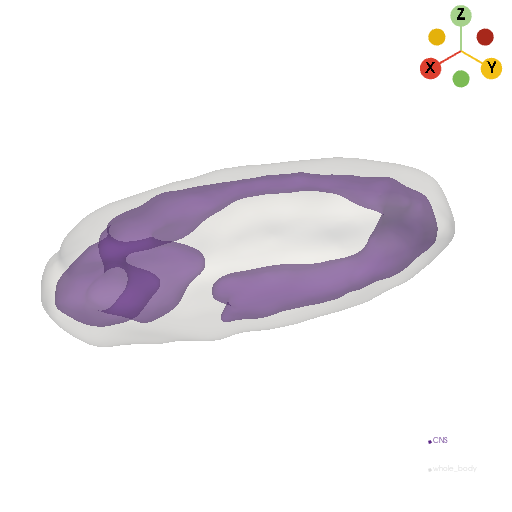

In [107]:
cns_model_vis1 = st.tdr.collect_model(models=[shell, cns_mesh])
_ = st.pl.three_d_plot(model=cns_model_vis1, key="tissue", model_style="surface", opacity=0.5, off_screen=False, window_size=(512, 512),
                       filename=os.path.join(cns_image_folder, f"CNS_mesh_iso1.pdf"))
_ = st.pl.three_d_plot(model=cns_model_vis1, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512), jupyter="static", filename=None)

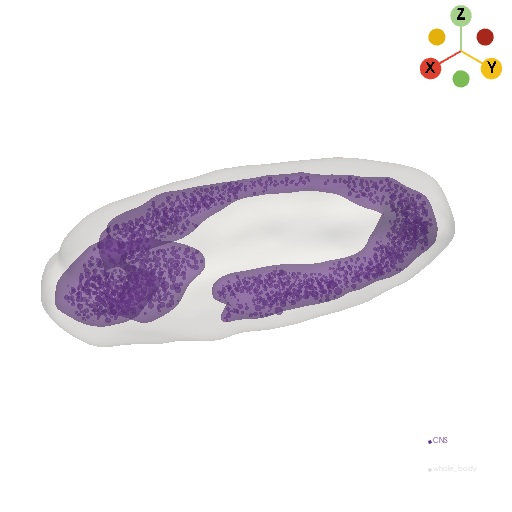

In [108]:
cns_model_vis2 = st.tdr.collect_model(models=[shell, cns_mesh, cns_cell])
_ = st.pl.three_d_plot(model=cns_model_vis2, key="tissue", model_style="surface", opacity=0.5, off_screen=True, window_size=(512, 512),
                       filename=os.path.join(cns_image_folder, f"CNS_mesh_iso2.pdf"))
_ = st.pl.three_d_plot(model=cns_model_vis2, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512), jupyter="static", filename=None)

##### Epidermis

In [109]:
epi_color = mplc.to_hex(c=epi_tpc["tissue_rgba"][0], keep_alpha=True)
epi_mesh, epi_mpc = st.tdr.construct_surface(pc=epi_tpc, key_added="tissue", label="Epidermis", color=epi_color,
                                             alpha=1.0, cs_method="marching_cube", smooth=3000, scale_factor=1)

In [110]:
epi_cell_radius = pow(np.asarray(epi_mpc.point_data["cell_area"]), 1 / 2)
epi_cell = st.tdr.construct_cells(pc=epi_mpc, cell_size=epi_cell_radius, geometry="sphere", factor=0.3)

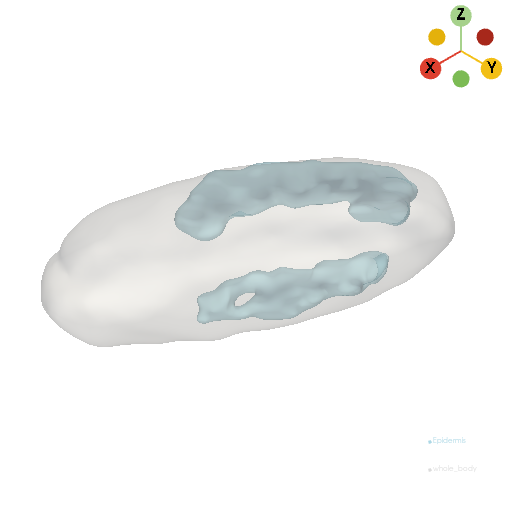

In [111]:
epi_model_vis1 = st.tdr.collect_model(models=[shell, epi_mesh])
_ = st.pl.three_d_plot(model=epi_model_vis1, key="tissue", model_style="surface", opacity=0.5, off_screen=False,
                       window_size=(512, 512), filename=os.path.join(epi_image_folder, f"Epidermis_mesh_iso1.pdf"))
_ = st.pl.three_d_plot(model=epi_model_vis1, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

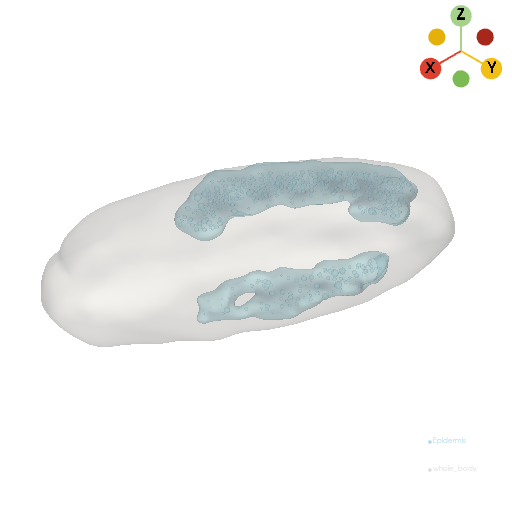

In [112]:
epi_model_vis2 = st.tdr.collect_model(models=[shell, epi_mesh, epi_cell])
_ = st.pl.three_d_plot(model=epi_model_vis2, key="tissue", model_style="surface", opacity=0.5, off_screen=True,
                       window_size=(512, 512), filename=os.path.join(epi_image_folder, f"Epidermis_mesh_iso2.pdf"))
_ = st.pl.three_d_plot(model=epi_model_vis2, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

##### Fat body

In [113]:
fb_color = mplc.to_hex(c=fb_tpc["tissue_rgba"][0], keep_alpha=True)
fb_mesh, fb_mpc = st.tdr.construct_surface(pc=fb_tpc, key_added="tissue", label="Fat body", color=fb_color, uniform_pc=True, uniform_pc_alpha=45,
                                             alpha=1.0, cs_method="marching_cube", smooth=3000, scale_factor=1)

In [114]:
fb_cell_radius = pow(np.asarray(fb_mpc.point_data["cell_area"]), 1 / 2)
fb_cell = st.tdr.construct_cells(pc=fb_mpc, cell_size=fb_cell_radius, geometry="sphere", factor=0.3)

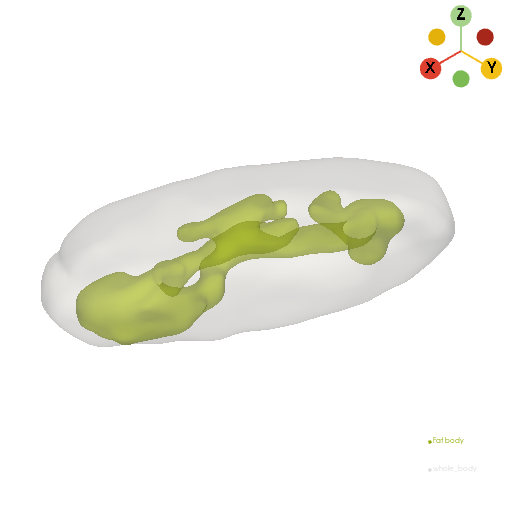

In [115]:
fb_model_vis1 = st.tdr.collect_model(models=[shell, fb_mesh])
_ = st.pl.three_d_plot(model=fb_model_vis1, key="tissue", model_style="surface", opacity=0.5, off_screen=False,
                       window_size=(512, 512), filename=os.path.join(fb_image_folder, f"Fat body_mesh_iso1.pdf"))
_ = st.pl.three_d_plot(model=fb_model_vis1, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

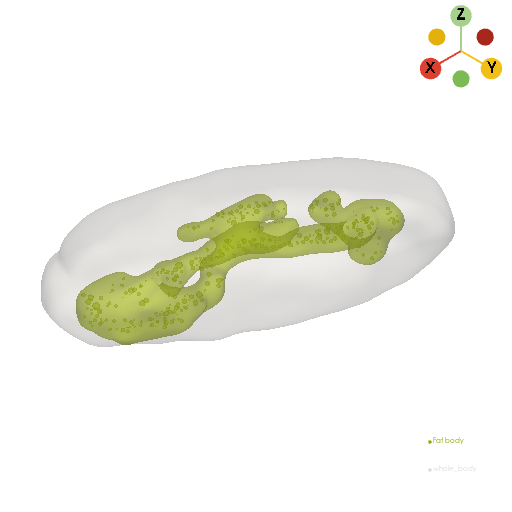

In [116]:
fb_model_vis2 = st.tdr.collect_model(models=[shell, fb_mesh, fb_cell])
_ = st.pl.three_d_plot(model=fb_model_vis2, key="tissue", model_style="surface", opacity=0.5, off_screen=True,
                       window_size=(512, 512), filename=os.path.join(fb_image_folder, f"Fat body_mesh_iso2.pdf"))
_ = st.pl.three_d_plot(model=fb_model_vis2, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

##### Foregut

In [117]:
for_color = mplc.to_hex(c=for_tpc["tissue_rgba"][0], keep_alpha=True)
for_mesh, for_mpc = st.tdr.construct_surface(pc=for_tpc, key_added="tissue", label="Foregut", color=for_color,
                                             alpha=1.0, cs_method="marching_cube", smooth=3000, scale_factor=1)

In [118]:
for_cell_radius = pow(np.asarray(for_mpc.point_data["cell_area"]), 1 / 2)
for_cell = st.tdr.construct_cells(pc=for_mpc, cell_size=for_cell_radius, geometry="sphere", factor=0.3)

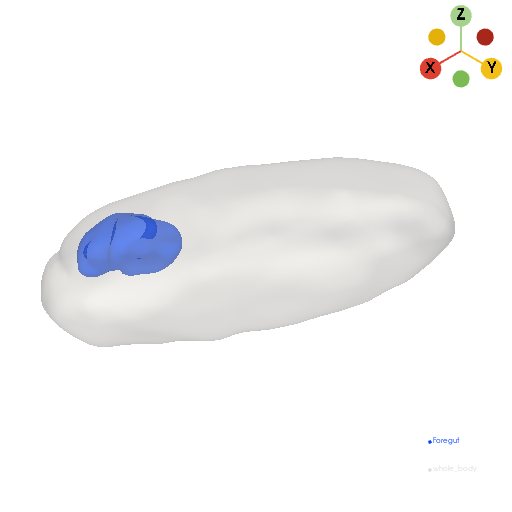

In [119]:
for_model_vis1 = st.tdr.collect_model(models=[shell, for_mesh])
_ = st.pl.three_d_plot(model=for_model_vis1, key="tissue", model_style="surface", opacity=0.5, off_screen=False,
                       window_size=(512, 512), filename=os.path.join(for_image_folder, f"Foregut_mesh_iso1.pdf"))
_ = st.pl.three_d_plot(model=for_model_vis1, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

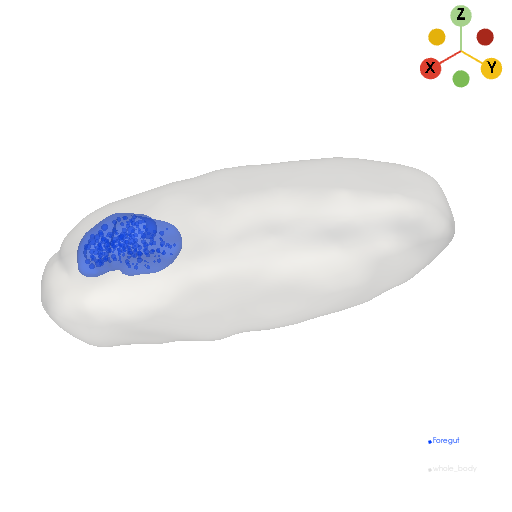

In [120]:
for_model_vis2 = st.tdr.collect_model(models=[shell, for_mesh, for_cell])
_ = st.pl.three_d_plot(model=for_model_vis2, key="tissue", model_style="surface", opacity=0.5, off_screen=True,
                       window_size=(512, 512), filename=os.path.join(for_image_folder, f"Foregut_mesh_iso2.pdf"))
_ = st.pl.three_d_plot(model=for_model_vis2, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

##### Midgut

In [183]:
mid_color = mplc.to_hex(c=mid_tpc["tissue_rgba"][0], keep_alpha=True)
mid_mesh, mid_mpc = st.tdr.construct_surface(pc=mid_tpc, key_added="tissue", label="Midgut", color=mid_color,
                                             alpha=1.0, cs_method="marching_cube", smooth=3000, scale_factor=1)

In [184]:
mid_cell_radius = pow(np.asarray(mid_mpc.point_data["cell_area"]), 1 / 2)
mid_cell = st.tdr.construct_cells(pc=mid_mpc, cell_size=mid_cell_radius, geometry="sphere", factor=0.3)

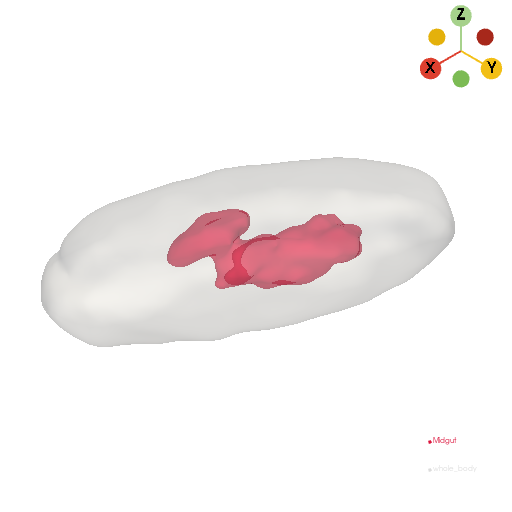

In [185]:
mid_model_vis1 = st.tdr.collect_model(models=[shell, mid_mesh])
_ = st.pl.three_d_plot(model=mid_model_vis1, key="tissue", model_style="surface", opacity=0.5, off_screen=False,
                       window_size=(512, 512), filename=os.path.join(mid_image_folder, f"Midgut_mesh_iso1.pdf"))
_ = st.pl.three_d_plot(model=mid_model_vis1, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

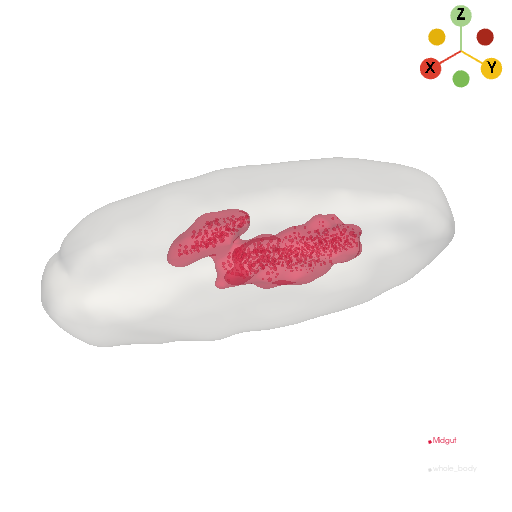

In [186]:
mid_model_vis2 = st.tdr.collect_model(models=[shell, mid_mesh, mid_cell])
_ = st.pl.three_d_plot(model=mid_model_vis2, key="tissue", model_style="surface", opacity=0.5, off_screen=True,
                       window_size=(512, 512), filename=os.path.join(mid_image_folder, f"Midgut_mesh_iso2.pdf"))
_ = st.pl.three_d_plot(model=mid_model_vis2, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

##### Muscle

In [125]:
mus_color = mplc.to_hex(c=mus_tpc["tissue_rgba"][0], keep_alpha=True)
mus_mesh, mus_mpc = st.tdr.construct_surface(pc=mus_tpc, key_added="tissue", label="Muscle", color=mus_color,
                                             alpha=1.0, cs_method="marching_cube", smooth=3000, scale_factor=1)

In [126]:
mus_cell_radius = pow(np.asarray(mus_mpc.point_data["cell_area"]), 1 / 2)
mus_cell = st.tdr.construct_cells(pc=mus_mpc, cell_size=mus_cell_radius, geometry="sphere", factor=0.3)

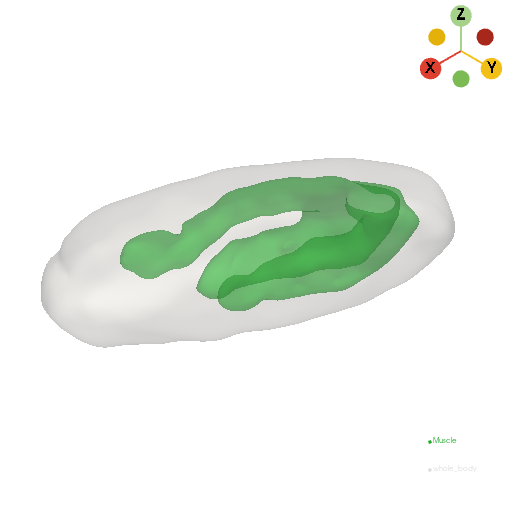

In [127]:
mus_model_vis1 = st.tdr.collect_model(models=[shell, mus_mesh])
_ = st.pl.three_d_plot(model=mus_model_vis1, key="tissue", model_style="surface", opacity=0.5, off_screen=False,
                       window_size=(512, 512), filename=os.path.join(mus_image_folder, f"Muscle_mesh_iso1.pdf"))
_ = st.pl.three_d_plot(model=mus_model_vis1, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

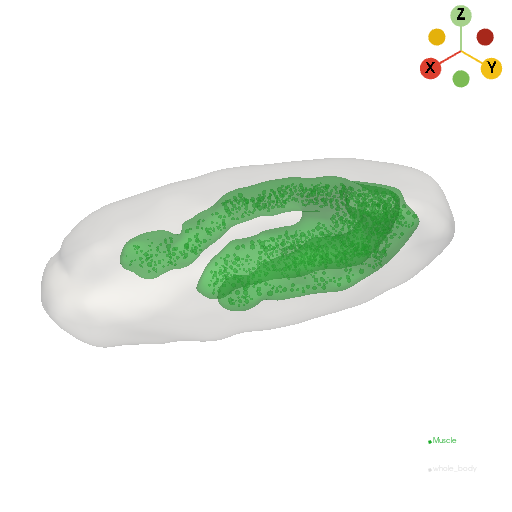

In [128]:
mus_model_vis2 = st.tdr.collect_model(models=[shell, mus_mesh, mus_cell])
_ = st.pl.three_d_plot(model=mus_model_vis2, key="tissue", model_style="surface", opacity=0.5, off_screen=True,
                       window_size=(512, 512), filename=os.path.join(mus_image_folder, f"Muscle_mesh_iso2.pdf"))
_ = st.pl.three_d_plot(model=mus_model_vis2, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

##### Salivary gland body

In [129]:
sgb_color = mplc.to_hex(c=sgb_tpc["tissue_rgba"][0], keep_alpha=True)
sgb_mesh, sgb_mpc = st.tdr.construct_surface(pc=sgb_tpc, key_added="tissue", label="Salivary gland body", color=sgb_color,
                                             alpha=1.0, cs_method="marching_cube", smooth=3000, scale_factor=1)

In [130]:
sgb_cell_radius = pow(np.asarray(sgb_mpc.point_data["cell_area"]), 1 / 2)
sgb_cell = st.tdr.construct_cells(pc=sgb_mpc, cell_size=sgb_cell_radius, geometry="sphere", factor=0.3)

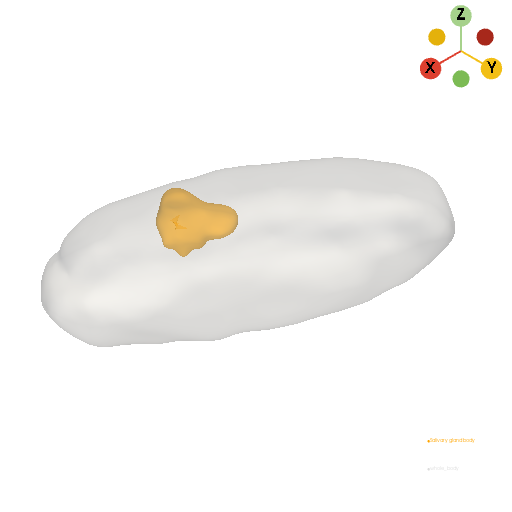

In [131]:
sgb_model_vis1 = st.tdr.collect_model(models=[shell, sgb_mesh])
_ = st.pl.three_d_plot(model=sgb_model_vis1, key="tissue", model_style="surface", opacity=0.5, off_screen=False,
                       window_size=(512, 512), filename=os.path.join(sgb_image_folder, f"Salivary gland body_mesh_iso1.pdf"))
_ = st.pl.three_d_plot(model=sgb_model_vis1, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

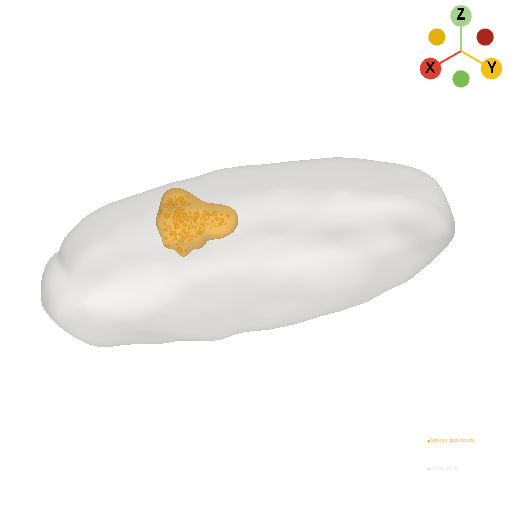

In [132]:
sgb_model_vis2 = st.tdr.collect_model(models=[shell, sgb_mesh, sgb_cell])
_ = st.pl.three_d_plot(model=sgb_model_vis2, key="tissue", model_style="surface", opacity=0.5, off_screen=True,
                       window_size=(512, 512), filename=os.path.join(sgb_image_folder, f"Salivary gland body_mesh_iso2.pdf"))
_ = st.pl.three_d_plot(model=sgb_model_vis2, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

##### Sensory nervous system

In [133]:
sns_color = mplc.to_hex(c=sns_tpc["tissue_rgba"][0], keep_alpha=True)
sns_mesh, sns_mpc = st.tdr.construct_surface(pc=sns_tpc, key_added="tissue", label="Sensory nervous system", color=sns_color,
                                             alpha=1.0, cs_method="marching_cube", smooth=3000, scale_factor=1)

In [134]:
sns_cell_radius = pow(np.asarray(sns_mpc.point_data["cell_area"]), 1 / 2)
sns_cell = st.tdr.construct_cells(pc=sns_mpc, cell_size=sns_cell_radius, geometry="sphere", factor=0.3)

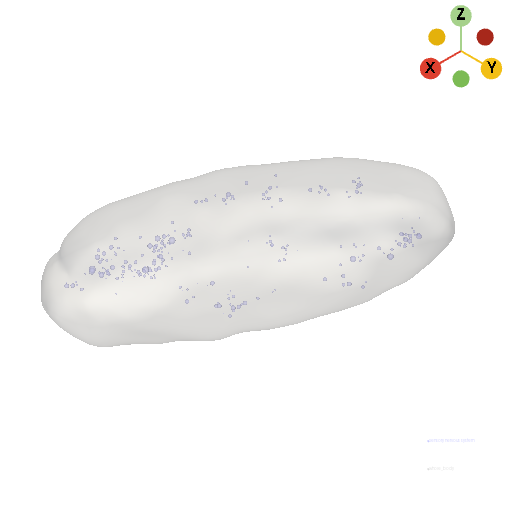

In [135]:
sns_model_vis = st.tdr.collect_model(models=[shell, sns_cell])
_ = st.pl.three_d_plot(model=sns_model_vis, key="tissue", model_style="surface", opacity=0.5, off_screen=True,
                       window_size=(512, 512), filename=os.path.join(sns_image_folder, f"Sensory nervous system_mesh_iso.pdf"))
_ = st.pl.three_d_plot(model=sns_model_vis, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

##### Tracheal

In [206]:
tra_color = mplc.to_hex(c=tra_tpc["tissue_rgba"][0], keep_alpha=True)
tra_mesh, tra_mpc = st.tdr.construct_surface(pc=tra_tpc, key_added="tissue", label="Tracheal", color=tra_color,
                                             alpha=1.0, cs_method="marching_cube", smooth=3000, scale_factor=1)

In [207]:
tra_cell_radius = pow(np.asarray(tra_mpc.point_data["cell_area"]), 1 / 2)
tra_cell = st.tdr.construct_cells(pc=tra_mpc, cell_size=tra_cell_radius, geometry="sphere", factor=0.3)

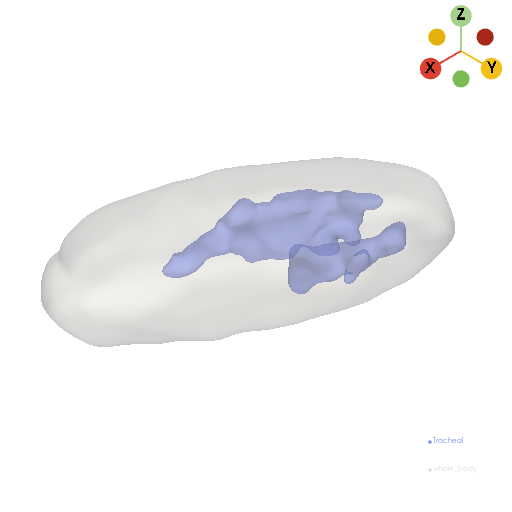

In [210]:
tra_model_vis1 = st.tdr.collect_model(models=[shell, tra_mesh])
_ = st.pl.three_d_plot(model=tra_model_vis1, key="tissue", model_style="surface", opacity=0.5, off_screen=False,
                       window_size=(512, 512), filename=os.path.join(tra_image_folder, f"Tracheal_mesh_iso1.pdf"))
_ = st.pl.three_d_plot(model=tra_model_vis1, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

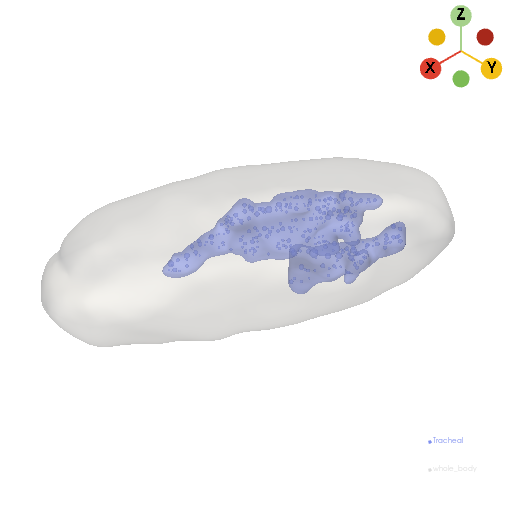

In [211]:
tra_model_vis2 = st.tdr.collect_model(models=[shell, tra_mesh, tra_cell])
_ = st.pl.three_d_plot(model=tra_model_vis2, key="tissue", model_style="surface", opacity=0.5, off_screen=True,
                       window_size=(512, 512), filename=os.path.join(tra_image_folder, f"Tracheal_mesh_iso2.pdf"))
_ = st.pl.three_d_plot(model=tra_model_vis2, key="tissue", model_style="surface", opacity=0.5, window_size=(512, 512),
                       jupyter="static", filename=None)

#### Visualize all tissue mesh models

In [212]:
tissue_meshes = st.tdr.collect_model(
    [amn_mesh, cns_mesh, epi_mesh, fb_mesh, for_mesh, mid_mesh, mus_mesh, sgb_mesh, sns_mesh, tra_mesh])
tissue_meshes_vis = st.tdr.collect_model(
    [amn_model_vis2, cns_model_vis2, epi_model_vis2, fb_model_vis2, for_model_vis2, mid_model_vis2, mus_model_vis2, sgb_model_vis2, sns_model_vis, tra_model_vis2])
tissue_text = ['Amnioserosa', 'CNS', 'Epidermis', 'Fat body', 'Foregut', 'Midgut', 'Muscle', 'Salivary gland body', 'Sensory nervous system', 'Tracheal']

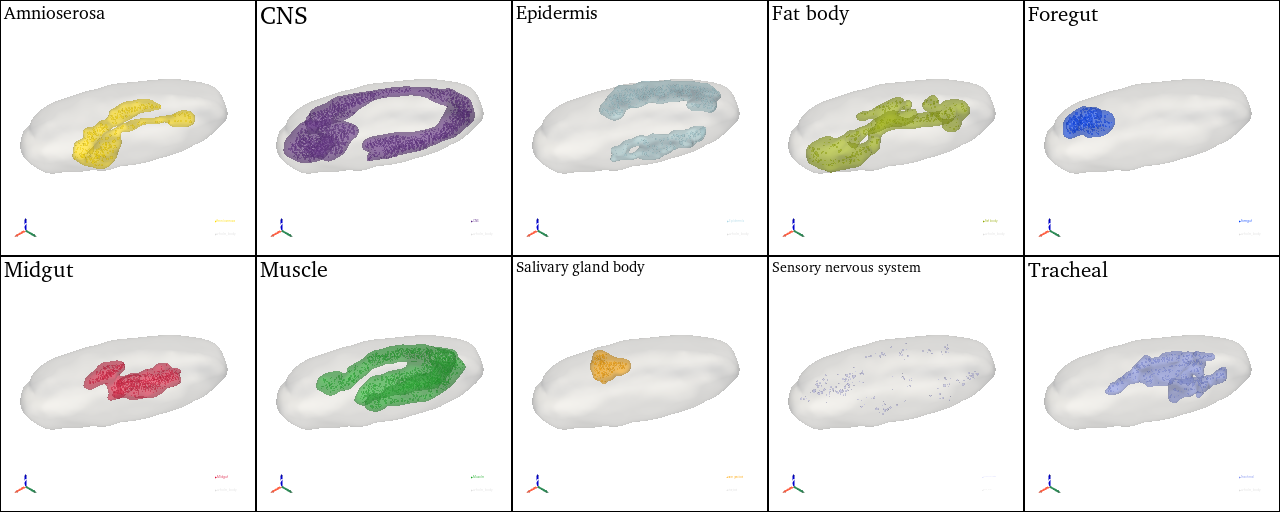

In [213]:
st.pl.three_d_multi_plot(model=tissue_meshes_vis, key="tissue", model_style="surface", off_screen=True, opacity=0.5,
                         text=tissue_text, shape=(2, 5), window_size=(256*5, 256*2),
                         text_kwargs={"text_size": 10}, show_legend=True, jupyter="static", filename=None)
st.pl.three_d_multi_plot(model=tissue_meshes_vis, key="tissue", model_style="surface", off_screen=True, opacity=0.5,
                         text=tissue_text, shape=(2, 5), window_size=(256*5, 256*2),
                         text_kwargs={"text_size": 10}, show_legend=True,
                         filename=os.path.join(save_image_folder, f"tissue_mesh_iso.pdf"))

#### Save all tissue mesh models

In [214]:
for tm, tt in zip(tissue_meshes, tissue_text):
    st.tdr.save_model(model=tm, filename=os.path.join(save_model_folder, f"{tt}/{tt}_mesh.vtk"))

### Integrate multiple tissue models

In [215]:
mmodel = st.tdr.collect_model(
    [shell, amn_mesh, cns_mesh, for_mesh, mid_mesh, mus_mesh, sgb_mesh, tra_mesh]
)

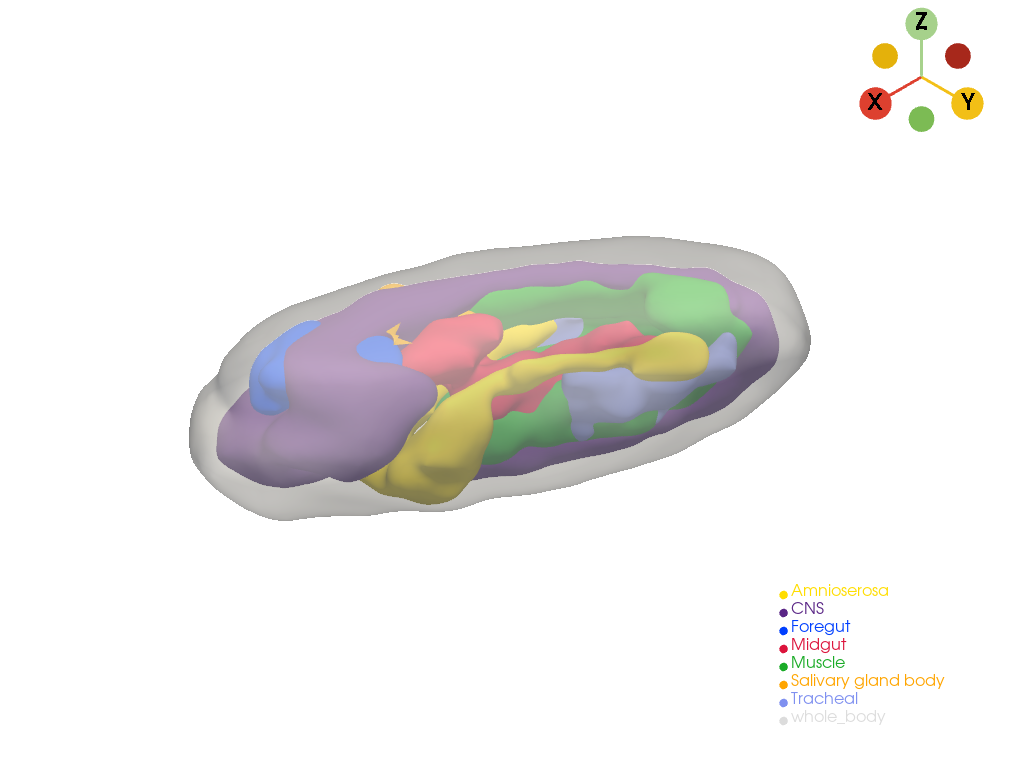

In [216]:
st.pl.three_d_plot(model=mmodel, key="tissue", model_style="surface", filename=os.path.join(save_image_folder, f"complete_mesh.pdf"))
st.pl.three_d_plot(model=mmodel, key="tissue", model_style="surface", jupyter="static", filename=None)